<a href="https://colab.research.google.com/github/Gitinitty-5/Python-Projects/blob/main/Ecommerce_A_B_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SOURCE: https://www.kaggle.com/datasets/putdejudomthai/ecommerce-ab-testing-2022-dataset1

This is a project to examine the results of an A/B test run by an e-commerce website. The company has developed a new web page in order to try and increase the number of users who "convert," meaning the number of users who decide to pay for the company's product.

The goal is to work through this notebook to help the company understand if they should implement this new page, keep the old page, or perhaps run the experiment longer to make their decision.

In [2]:
##Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import random

In [3]:
##Load Data
from google.colab import files
uploaded = files.upload()

Saving countries_data.xlsx to countries_data.xlsx
Saving ab_data.xlsx to ab_data.xlsx


In [4]:
df1= pd.read_excel("ab_data.xlsx")
df2= pd.read_excel("countries_data.xlsx")

##merging both tables
merged_df = pd.merge(df1, df2, on='user_id')

##Display the merged table
merged_df

,user_id,timestamp,group,landing_page,converted,country
0,851104,11:48.6,control,old_page,0,US
1,804228,01:45.2,control,old_page,0,US
2,661590,55:06.2,treatment,new_page,0,US
3,853541,28:03.1,treatment,new_page,0,US
4,864975,52:26.2,control,old_page,1,US
...,...,...,...,...,...,...
294477,697314,20:29.0,control,old_page,0,US
294478,715931,40:24.5,treatment,new_page,0,UK
294479,759899,20:29.0,treatment,new_page,0,US
294480,759899,20:29.0,treatment,new_page,0,US


In [5]:
##find information from the table
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294482 entries, 0 to 294481
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294482 non-null  int64 
 1   timestamp     294482 non-null  object
 2   group         294482 non-null  object
 3   landing_page  294482 non-null  object
 4   converted     294482 non-null  int64 
 5   country       294482 non-null  object
dtypes: int64(2), object(4)
memory usage: 13.5+ MB


In [6]:
merged_df.describe()

,user_id,converted
count,294482.000000,294482.000000
mean,787973.348225,0.119658
std,91210.636700,0.324561
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787931.500000,0.000000
75%,866910.750000,0.000000
max,945999.000000,1.000000


In [7]:
##check for nulls
merged_df.isnull().sum()

,0
user_id,0
timestamp,0
group,0
landing_page,0
converted,0
country,0


In [8]:
##group distribution
group_distribution = merged_df.group.value_counts()
group_distribution_df= pd.DataFrame(group_distribution).reset_index()

# Rename the columns
group_distribution_df.columns = ['group', 'values']
group_distribution_df

,group,values
0,treatment,147280
1,control,147202


<ipython-input-9-305b1d20512c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= group_distribution_df, x= 'group', y= 'values', palette= ('red', 'blue'))


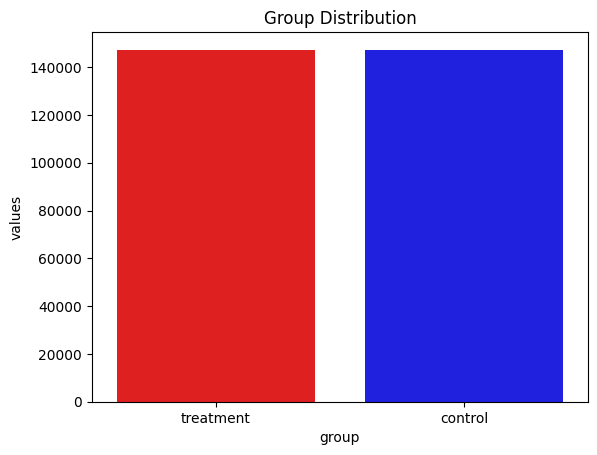

In [9]:
##plot a graph of the group distribution
sns.barplot(data= group_distribution_df, x= 'group', y= 'values', palette= ('red', 'blue'))
plt.title('Group Distribution')
plt.show()

In [10]:
##Page Distribution

page_distribution = merged_df.landing_page.value_counts()
page_distribution_df= pd.DataFrame(page_distribution).reset_index()

# Rename the columns
page_distribution_df.columns = ['landing_page', 'values']
page_distribution_df

,landing_page,values
0,new_page,147243
1,old_page,147239


<ipython-input-11-a0ad5b3847b0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= page_distribution_df, x= 'landing_page', y= 'values', palette= ('red', 'blue'))


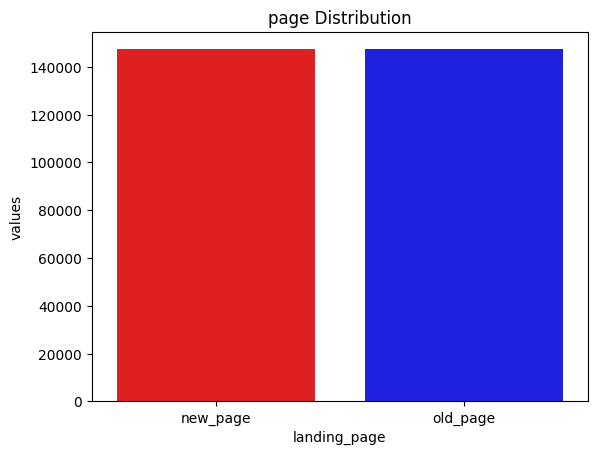

In [11]:
##plot a graph of the landing page distribution
sns.barplot(data= page_distribution_df, x= 'landing_page', y= 'values', palette= ('red', 'blue'))
plt.title('page Distribution')
plt.show()

In [12]:
##Page Distribution
country_distribution = merged_df.country.value_counts()
country_distribution_df= pd.DataFrame(country_distribution).reset_index()

# Rename the columns
country_distribution_df.columns = ['country', 'values']
country_distribution_df

,country,values
0,US,206368
1,UK,73419
2,CA,14695


<ipython-input-26-26bb20d67039>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= country_distribution_df, x= 'country', y= 'values', palette= ('red', 'yellow','green'))


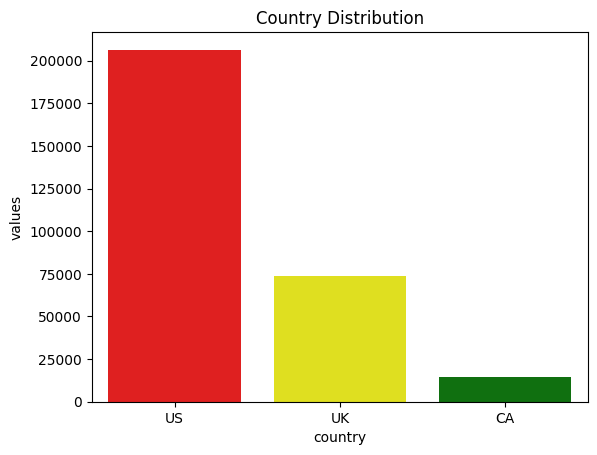

In [26]:
##plot a graph of the landing page distribution
sns.barplot(data= country_distribution_df, x= 'country', y= 'values', palette= ('red', 'yellow','green'))
plt.title('Country Distribution')
plt.show()

In [14]:
# Count of total conversions (1s) for both groups
conversion_counts = merged_df.groupby('group')['converted'].apply(lambda x: (x==1).sum())  # Count of '1s'
conversion_counts= pd.DataFrame({'group': conversion_counts.index, 'values': conversion_counts.values})
conversion_counts

,group,values
0,control,17723
1,treatment,17514


In [16]:
# Count of total non-conversions (0s) for both groups
non_conversion_counts = merged_df.groupby('group')['converted'].apply(lambda x: (x == 0).sum())  # Count of '0s'
non_conversion_counts= pd.DataFrame({'group': non_conversion_counts.index, 'values': non_conversion_counts.values})
non_conversion_counts

,group,values
0,control,129479
1,treatment,129766


#Clickthrough Rate for Treatment Group

In [18]:
# Filter the DataFrame for the treatment group
# treatment group users
treatment_group = merged_df.query("group == 'treatment'")


# click through rate for experiment group users
clickthrough_rate_tr = treatment_group[treatment_group['converted'] == 1]['user_id'].nunique()/treatment_group[treatment_group['converted'] == 0]['user_id'].nunique()
print(float(clickthrough_rate_tr))



0.1355821848791604


In [19]:
# Filter the DataFrame for the control group
# treatment group users
control_group = merged_df.query("group == 'control'")


# click through rate for treatment group users
clickthrough_rate_ctrl = control_group[control_group['converted'] == 1]['user_id'].nunique()/control_group[control_group['converted'] == 0]['user_id'].nunique()
print(float(clickthrough_rate_ctrl))

0.137538844002486


#Conversion Rates by Landing Page


Conversion Rates by Landing page:
landing_page
old_page    0.120478
new_page    0.118838
Name: converted, dtype: float64


<ipython-input-24-228f9affd5b0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= conversion_by_landing_page.index, y= conversion_by_landing_page.values, palette=('red','blue'))
<ipython-input-24-228f9affd5b0>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


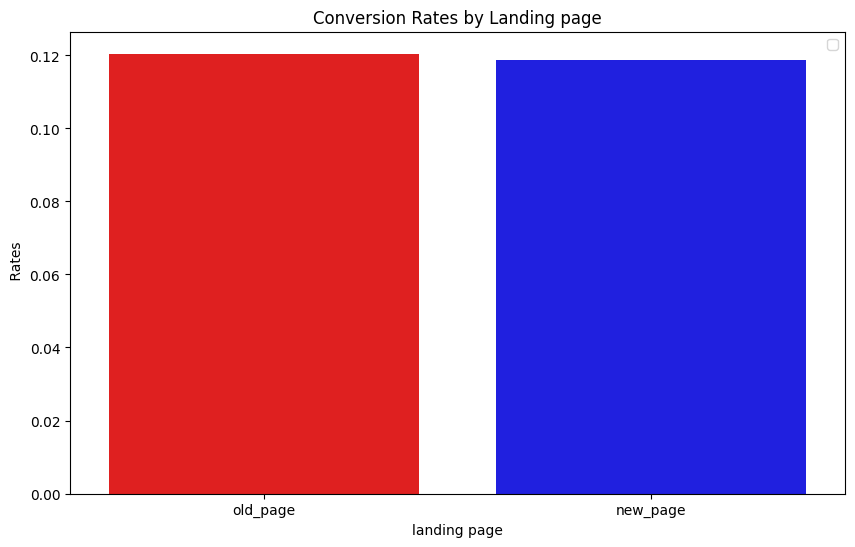

In [24]:
#conversion rates by landing page
conversion_by_landing_page = merged_df.groupby('landing_page')['converted'].mean().reindex(
    ['new_page','old_page']).sort_index(ascending=False) # Use sort_index instead of sortindex
print("\nConversion Rates by Landing page:")
print(conversion_by_landing_page)

plt.figure(figsize=(10, 6))
sns.barplot(x= conversion_by_landing_page.index, y= conversion_by_landing_page.values, palette=('red','blue'))
plt.legend()
plt.title('Conversion Rates by Landing page')
plt.xlabel('landing page')
plt.ylabel(' Rates')
plt.show()

#Conversion Rates by Country


Conversion Rates by country:
country
US    0.119597
UK    0.120582
CA    0.115890
Name: converted, dtype: float64


<ipython-input-28-9ced65af75b2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= conversion_by_country.index, y= conversion_by_country.values, palette=('red','yellow','green'))
<ipython-input-28-9ced65af75b2>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


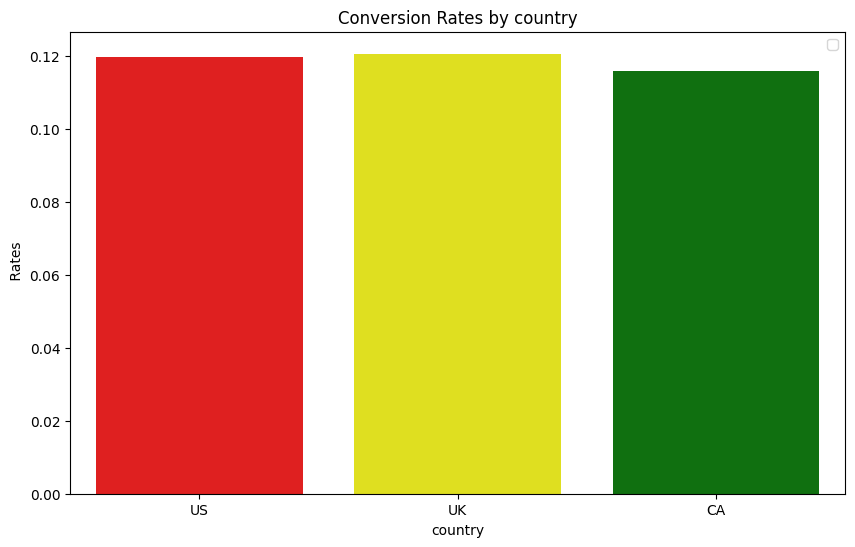

In [28]:
#conversion rates by landing page
conversion_by_country = merged_df.groupby('country')['converted'].mean().reindex(
    ['US','UK','CA']).sort_index(ascending=False) # Use sort_index instead of sortindex
print("\nConversion Rates by country:")
print(conversion_by_country)

plt.figure(figsize=(10, 6))
sns.barplot(x= conversion_by_country.index, y= conversion_by_country.values, palette=('red','yellow','green'))
plt.legend()
plt.title('Conversion Rates by country')
plt.xlabel('country')
plt.ylabel(' Rates')
plt.show()

A/B TESTING
Test 1

*Null Hypothesis (H0): There is no significant difference in conversion rates between (Treatment) and (Control) group irrespective of the introduction of the new page to convert users patronage for the company's product.

*Alternative Hypothesis (H1): There is a significant difference in conversion rates between (Treatment) and (Control) group due to the introduction of the new page.

In [29]:
##Calculating for the sample sizes and conversion of various groups
conversion_counts = merged_df.groupby('group')['converted'].sum()
sample_sizes = merged_df['group'].value_counts()

#Calculate conversion rates
conversion_rates = conversion_counts / sample_sizes

print(f"Conversion Rates:{conversion_rates}")

print('*'*50)

print(f"\nConversion Counts:{conversion_counts}")

print('*'*50)

print(f"\nSample Sizes: {sample_sizes}")

Conversion Rates:group
control      0.120399
treatment    0.118916
dtype: float64
**************************************************

Conversion Counts:group
control      17723
treatment    17514
Name: converted, dtype: int64
**************************************************

Sample Sizes: group
treatment    147280
control      147202
Name: count, dtype: int64


#Two Sample Test

In [42]:
# Decision based on p-value
import numpy as np
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest


# Get conversion counts as a list or array
conversion_counts = merged_df.groupby('group')['converted'].sum().values

# Perform one-sample t-test
total_users = merged_df['group'].value_counts()
z_stat, p_val = proportions_ztest(count = conversion_counts, nobs = total_users)


print(f"z-Statistic: {z_stat}")

print('*'*120)
print(f"P-Value: {p_val}")

print('*'*120)

# Decision based on p-value
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is no significant difference in conversion rates between (Treatment) and (Control) group irrespective of the introduction of the new page to convert users patronage for company's product.")
else:
    print("Fail to reject the null hypothesis: No significant difference in conversion rates between (Treatment) and (Control) group irrespective of the introduction of the new page to convert users patronage for company's product.")


z-Statistic: 1.1336536632766563
************************************************************************************************************************
P-Value: 0.25693985351849
************************************************************************************************************************
Fail to reject the null hypothesis: No significant difference in conversion rates between (Treatment) and (Control) group irrespective of the introduction of the new page to convert users patronage for company's product.


#CHI-SQUARE TEST

In [41]:
from scipy.stats import chi2_contingency

# Use 'converted_int' instead of 'conversion_counts'
contingency_table = pd.crosstab(merged_df['group'], merged_df['converted'])

chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print('*'*120)

print(f"P-value: {p}")
print('*'*120)

print("Degree of Freedom")
print(dof)
print('*'*120)

print("Expected Frequencies:")
print(ex)
print('*'*120)

# Decision based on p-value
alpha = 0.05
if p < alpha:  # Use p directly from chi2_contingency
   print("Reject the null hypothesis: There is a significant difference in conversion rates between (Treatment) and (Control) group irrespective of the introduction of the new page to convert users patronage for company's product.")
else:
    print("Fail to reject the null hypothesis: No significant difference in conversion rates between (Treatment) and (Control) group irrespective of the introduction of the new page to convert users patronage for company's product.")


Chi-square statistic: 1.5226566344991435
************************************************************************************************************************
P-value: 0.21721790752053097
************************************************************************************************************************
Degree of Freedom
1
************************************************************************************************************************
Expected Frequencies:
[[129588.16664516  17613.83335484]
 [129656.83335484  17623.16664516]]
************************************************************************************************************************
Fail to reject the null hypothesis: No significant difference in conversion rates between (Treatment) and (Control) group irrespective of the introduction of the new page to convert users patronage for company's product.


In conclusion, observing the various calculations of the clickthrough rates, two sample test & Chi sqaure test for both groups, one could clearly indicate that we accept the Null Hypothesis due to the fact that, after the company developed a new web page in order to try and increase the number of users who "convert," meaning the number of users who decide to pay for the company's product. there still seem to be insignificant differences between these both groups.